<a href="https://colab.research.google.com/github/spegas/Dacon/blob/main/dqn_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 

In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.8 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv

In [ ]:
# 예제 데이터 생성 (가상의 데이터)
def create_graph_data():
    # 노드 특징 (Ar, CF4, e-)
    x = torch.tensor([[1, 0, 0], [0, 1, 0], [0, 0, 1]], dtype=torch.float)

    # 간선 인덱스 (각 노드 간의 상호작용)
    edge_index = torch.tensor([
        [0, 1, 1, 2],
        [1, 0, 2, 1]
    ], dtype=torch.long)

    # 간선 특성 임의로 설정 (반응 에너지를 모르는 경우, 여기서는 0.5로 초기화)
    edge_attr = torch.tensor([
        [0.5], [0.5], [0.5], [0.5]
    ], dtype=torch.float).view(-1, 1)

    # 라벨 (반응 결과)
    y = torch.tensor([1], dtype=torch.float)  # 가상의 라벨

    return Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)

In [ ]:
class GNNModel(torch.nn.Module):
    def __init__(self):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(3, 16)
        self.conv2 = GCNConv(16, 32)
        self.fc1 = torch.nn.Linear(32, 16)
        self.fc2 = torch.nn.Linear(16, 1)
        self.edge_weight_transform = torch.nn.Linear(1, 1, bias=False)  # 간선 특성을 변환하는 층

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        edge_weight = self.edge_weight_transform(edge_attr.unsqueeze(-1)).squeeze()  # 간선 특성 변환
        x = F.relu(self.conv1(x, edge_index, edge_weight=edge_weight))
        x = F.relu(self.conv2(x, edge_index, edge_weight=edge_weight))
        x = torch.mean(x, dim=0)  # 그래프 풀링
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
# 데이터 로더 준비
data_list = [create_graph_data() for _ in range(100)]  # 가상의 데이터셋 생성
loader = DataLoader(data_list, batch_size=10, shuffle=True)

/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
print(data_list)

[Data(x=[3, 3], edge_index=[2, 4], edge_attr=[4, 1], y=[1]), Data(x=[3, 3], edge_index=[2, 4], edge_attr=[4, 1], y=[1]), Data(x=[3, 3], edge_index=[2, 4], edge_attr=[4, 1], y=[1]), Data(x=[3, 3], edge_index=[2, 4], edge_attr=[4, 1], y=[1]), Data(x=[3, 3], edge_index=[2, 4], edge_attr=[4, 1], y=[1]), Data(x=[3, 3], edge_index=[2, 4], edge_attr=[4, 1], y=[1]), Data(x=[3, 3], edge_index=[2, 4], edge_attr=[4, 1], y=[1]), Data(x=[3, 3], edge_index=[2, 4], edge_attr=[4, 1], y=[1]), Data(x=[3, 3], edge_index=[2, 4], edge_attr=[4, 1], y=[1]), Data(x=[3, 3], edge_index=[2, 4], edge_attr=[4, 1], y=[1]), Data(x=[3, 3], edge_index=[2, 4], edge_attr=[4, 1], y=[1]), Data(x=[3, 3], edge_index=[2, 4], edge_attr=[4, 1], y=[1]), Data(x=[3, 3], edge_index=[2, 4], edge_attr=[4, 1], y=[1]), Data(x=[3, 3], edge_index=[2, 4], edge_attr=[4, 1], y=[1]), Data(x=[3, 3], edge_index=[2, 4], edge_attr=[4, 1], y=[1]), Data(x=[3, 3], edge_index=[2, 4], edge_attr=[4, 1], y=[1]), Data(x=[3, 3], edge_index=[2, 4], edge_

In [ ]:
# 모델 학습
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GNNModel().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()

In [ ]:
model.train()

GNNModel(
  (conv1): GCNConv(3, 16)
  (conv2): GCNConv(16, 32)
  (fc1): Linear(in_features=32, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=1, bias=True)
  (edge_weight_transform): Linear(in_features=1, out_features=1, bias=False)
)

In [ ]:
for epoch in range(200):
    for data in loader:
        data = data.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, data.y)
        loss.backward()
        optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1, Loss: 0.12780824303627014
Epoch 11, Loss: 7.763350367895328e-06
Epoch 21, Loss: 2.0520474208751693e-11
Epoch 31, Loss: 1.4210854715202004e-14
Epoch 41, Loss: 0.0
Epoch 51, Loss: 0.0
Epoch 61, Loss: 0.0
Epoch 71, Loss: 0.0
Epoch 81, Loss: 0.0
Epoch 91, Loss: 0.0
Epoch 101, Loss: 0.0
Epoch 111, Loss: 0.0
Epoch 121, Loss: 0.0
Epoch 131, Loss: 0.0
Epoch 141, Loss: 0.0
Epoch 151, Loss: 0.0
Epoch 161, Loss: 0.0
Epoch 171, Loss: 0.0
Epoch 181, Loss: 0.0
Epoch 191, Loss: 0.0


In [ ]:
# 모델 평가
model.eval()
test_data = create_graph_data().to(device)
pred = model(test_data)
print(f'Predicted reaction outcome: {pred.item()}')

Predicted reaction outcome: 1.0


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# 주의 레이어 정의
class AttentionLayer(keras.layers.Layer):
    def __init__(self, units):
        super(AttentionLayer, self).__init__()
        self.W1 = keras.layers.Dense(units)
        self.W2 = keras.layers.Dense(units)
        self.V = keras.layers.Dense(1)

    def call(self, inputs):
        score = self.V(tf.nn.tanh(self.W1(inputs) + self.W2(inputs)))
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * inputs
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

# 모델 정의를 수정합니다
def create_model(input_shape):
    inputs = keras.layers.Input(shape=input_shape)
    attention_output, attention_weights = AttentionLayer(32)(inputs)
    x = keras.layers.Dense(64, activation='relu')(attention_output)
    x = keras.layers.Dense(32, activation='relu')(x)
    outputs = keras.layers.Dense(1)(x)

    model = keras.Model(inputs=inputs, outputs=[outputs, attention_weights])
    model.compile(optimizer='adam', loss=['mse', None])  # attention_weights에 대한 손실은 None
    return model
# 샘플 데이터 생성
np.random.seed(0)
X = np.random.rand(1000, 10, 5)  # (samples, time_steps, features)
y = np.sum(X, axis=(1,2)).reshape(-1, 1)  # 간단한 목표값

# 모델 생성 및 학습
model = create_model((10, 5))
model.fit(X, [y, np.zeros((len(X), 10, 1))], epochs=10, batch_size=32, validation_split=0.2)

# 예측 및 attention 가중치 추출
X_test = np.random.rand(100, 10, 5)
predictions, attention_weights = model.predict(X_test)

# attention 가중치 출력
print("Attention Weights 형태:", attention_weights.shape)
print("첫 번째 샘플의 Attention Weights:")
print(attention_weights[0])

Epoch 1/10
25/25 [==============================] - 2s 16ms/step - loss: 603.8256 - dense_17_loss: 603.8256 - val_loss: 579.2711 - val_dense_17_loss: 579.2711
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 538.9363 - dense_17_loss: 538.9363 - val_loss: 498.3931 - val_dense_17_loss: 498.3931
Epoch 3/10
25/25 [==============================] - 0s 5ms/step - loss: 432.9357 - dense_17_loss: 432.9357 - val_loss: 361.6000 - val_dense_17_loss: 361.6000
Epoch 4/10
25/25 [==============================] - 0s 6ms/step - loss: 271.1796 - dense_17_loss: 271.1796 - val_loss: 180.5483 - val_dense_17_loss: 180.5483
Epoch 5/10
25/25 [==============================] - 0s 5ms/step - loss: 102.2780 - dense_17_loss: 102.2780 - val_loss: 40.7678 - val_dense_17_loss: 40.7678
Epoch 6/10
25/25 [==============================] - 0s 5ms/step - loss: 15.0800 - dense_17_loss: 15.0800 - val_loss: 4.6525 - val_dense_17_loss: 4.6525
Epoch 7/10
25/25 [==============================] - 0s 5ms/

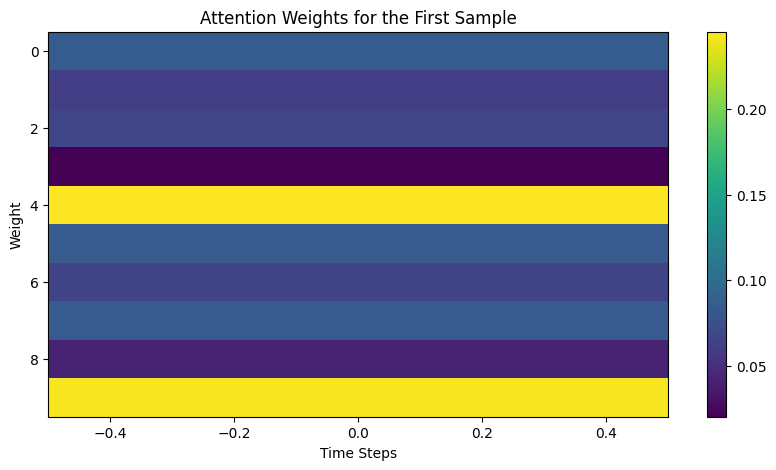

In [ ]:
# 시각화 (선택사항)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.imshow(attention_weights[0], aspect='auto', cmap='viridis')
plt.title('Attention Weights for the First Sample')
plt.xlabel('Time Steps')
plt.ylabel('Weight')
plt.colorbar()
plt.show()

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 5)]           0         
                                                                 
 attention_layer (Attention  (None, 5)                 417       
 Layer)                                                          
                                                                 
 dense_3 (Dense)             (None, 64)                384       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2914 (11.38 KB)
Trainable params: 2914 (11.38 KB)
Non-trainable params: 0 (0.00 Byte)
___________________________

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

class MultiAttentionLayer(keras.layers.Layer):
    def __init__(self, units, num_heads):
        super(MultiAttentionLayer, self).__init__()
        self.num_heads = num_heads
        self.attention_layers = [AttentionLayer(units) for _ in range(num_heads)]

    def call(self, inputs):
        attention_outputs = [layer(inputs) for layer in self.attention_layers]
        context_vectors, attention_weights = zip(*attention_outputs)
        concat_context = tf.concat(context_vectors, axis=-1)
        concat_weights = tf.concat(attention_weights, axis=-1)
        return concat_context, concat_weights

class AttentionLayer(keras.layers.Layer):
    def __init__(self, units):
        super(AttentionLayer, self).__init__()
        self.W1 = keras.layers.Dense(units)
        self.W2 = keras.layers.Dense(units)
        self.V = keras.layers.Dense(1)

    def call(self, inputs):
        score = self.V(tf.nn.tanh(self.W1(inputs) + self.W2(inputs)))
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * inputs
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

def create_attention_only_model(input_shape, num_attention_layers, units_per_layer, heads_per_layer):
    inputs = keras.layers.Input(shape=input_shape)
    x = inputs
    all_attention_weights = []

    for _ in range(num_attention_layers):
        x, attention_weights = MultiAttentionLayer(units_per_layer, heads_per_layer)(x)
        all_attention_weights.append(attention_weights)
        x = keras.layers.Reshape((1, -1))(x)  # Reshape for next attention layer

    # Final projection to output
    outputs = keras.layers.Dense(1)(x)
    outputs = keras.layers.Flatten()(outputs)  # Flatten to match expected output shape

    model = keras.Model(inputs=inputs, outputs=[outputs] + all_attention_weights)
    model.compile(optimizer='adam', loss=['mse'] + [None] * num_attention_layers)
    return model

# 샘플 데이터 생성
np.random.seed(0)
X = np.random.rand(1000, 10, 5)  # (samples, time_steps, features)
y = np.sum(X, axis=(1,2)).reshape(-1, 1)  # 간단한 목표값

# 모델 생성 및 학습
model = create_attention_only_model(
    input_shape=(10, 5),
    num_attention_layers=3,
    units_per_layer=32,
    heads_per_layer=4
)

# Prepare dummy outputs for attention weights (not used in loss calculation)
dummy_attention_outputs = [np.zeros((len(X), 10, 4)) for _ in range(3)]  # 3 layers, 4 heads each
model.fit(X, [y] + dummy_attention_outputs, epochs=10, batch_size=32, validation_split=0.2)

# 예측 및 attention 가중치 추출
X_test = np.random.rand(100, 10, 5)
predictions_and_weights = model.predict(X_test)
predictions = predictions_and_weights[0]
attention_weights = predictions_and_weights[1:]

print("예측 결과:", predictions[:5])
print("Attention Weights 형태 (각 레이어):")
for i, weights in enumerate(attention_weights):
    print(f"Layer {i+1}: {weights.shape}")

Epoch 1/10
25/25 [==============================] - 27s 283ms/step - loss: 552.1841 - flatten_loss: 552.1841 - val_loss: 458.2108 - val_flatten_loss: 458.2108
Epoch 2/10
25/25 [==============================] - 1s 24ms/step - loss: 373.0143 - flatten_loss: 373.0143 - val_loss: 296.4544 - val_flatten_loss: 296.4544
Epoch 3/10
25/25 [==============================] - 1s 21ms/step - loss: 229.4543 - flatten_loss: 229.4543 - val_loss: 171.4536 - val_flatten_loss: 171.4536
Epoch 4/10
25/25 [==============================] - 1s 26ms/step - loss: 124.3441 - flatten_loss: 124.3441 - val_loss: 86.8665 - val_flatten_loss: 86.8665
Epoch 5/10
25/25 [==============================] - 1s 25ms/step - loss: 58.8548 - flatten_loss: 58.8548 - val_loss: 39.0030 - val_flatten_loss: 39.0030
Epoch 6/10
25/25 [==============================] - 1s 26ms/step - loss: 25.1168 - flatten_loss: 25.1168 - val_loss: 16.9590 - val_flatten_loss: 16.9590
Epoch 7/10
25/25 [==============================] - 1s 25ms/step -

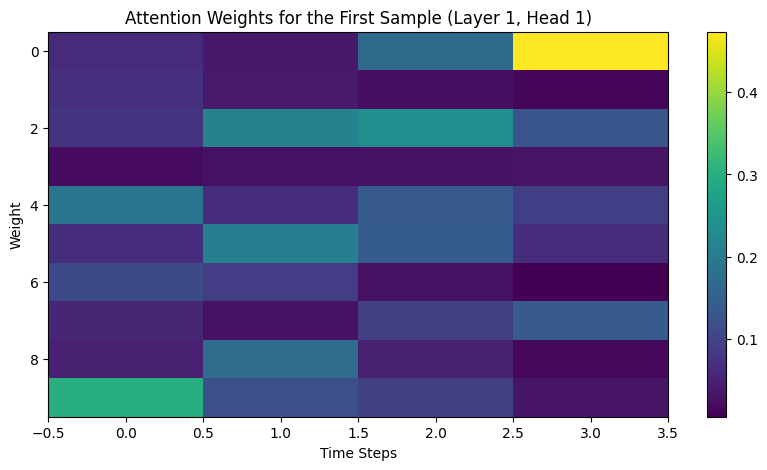

In [ ]:
# 시각화 (첫 번째 레이어의 첫 번째 헤드만)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.imshow(attention_weights[0][0, :], aspect='auto', cmap='viridis')
plt.title('Attention Weights for the First Sample (Layer 1, Head 1)')
plt.xlabel('Time Steps')
plt.ylabel('Weight')
plt.colorbar()
plt.show()

In [ ]:
model.summary()